# **Project 3**

# Imports and Other Setup

## Imports

In [ ]:
from collections import Counter
from google.colab import files
import math
import nltk
import matplotlib.pyplot as plt
import re
import requests
import wordcloud

## Setup Stop Words and Lemmatizer

In [ ]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Functions from Week 1

## `tokenize(doc)`

`tokenize(doc)` takes a document (a string) and returns a list of tokens. For example, `tokenize('Hello, class! Hello, world!')` returns `['hello','class','hello','world']`.

In [ ]:
def tokenize(doc):
  clean_doc = doc
  clean_doc = clean_doc.lower()
  clean_doc = re.sub('\s',' ',clean_doc)
  clean_doc = re.sub('[^A-Za-z0-9 ]+','',clean_doc)
  clean_doc = re.sub(' +',' ',clean_doc)
  clean_doc = clean_doc.strip()
  tokens = clean_doc.split(' ')
  final_tokens = []
  for token in tokens:
    if token not in stop_words:
      lemmatized_token = lemmatizer.lemmatize(token)
      final_tokens.append(lemmatized_token)
  return(final_tokens)

In [ ]:
# example
doc1 = 'Hello, class! Hello, world!'
tokenize(doc1)

['hello', 'class', 'hello', 'world']

## `generateWordFrequencies(doc)`

`generateWordFrequencies(doc)` takes a document (a string) and returns a Counter (a special type of Python dictionary) containing tokens and a count of how many times the token occured in the doc. For example, `generateWordFrequencies('Hello, class! Hello, world!')` returns `{'hello':2,'class':1,'world':1}`.

In [ ]:
def generateWordFrequencies(doc):
  word_frequencies = Counter()
  tokens = tokenize(doc)
  for token in tokens:
    word_frequencies[token] += 1
  return(word_frequencies)

In [ ]:
# example
doc1 = 'Hello, class! Hello, world!'
generateWordFrequencies(doc1)

Counter({'hello': 2, 'class': 1, 'world': 1})

## `generateCorpusWordFrequencies(corpus)`

`generateCorpusWordFrequencies(corpus)` takes a corpus (a list of strings) and returns a Counter (a special type of Python dictionary) containing tokens and a count of how many times the token occured in the corpus. Same as `generateWordFrequencies(doc)` but for a list of documents instead of a single document. 

In [ ]:
def generateCorpusWordFrequencies(corpus):
  corpus_word_frequencies = Counter()
  for doc in corpus:
    doc_word_frequencies = generateWordFrequencies(doc)
    corpus_word_frequencies = corpus_word_frequencies + doc_word_frequencies
  return(corpus_word_frequencies)

In [ ]:
# example
doc1 = 'Hello, class! Hello, world!'
doc2 = 'Hello, Hello, Hello!'
corpus1 = [doc1,doc2]
generateCorpusWordFrequencies(corpus1)

Counter({'hello': 5, 'class': 1, 'world': 1})

## `generateWordFrequencyDeltas(word_frequencies_a,word_frequencies_b)`

`generateWordFrequencyDeltas(word_frequencies_a,word_frequencies_b)` takes two Counters of tokens and frequency counts, as can be generated by `generateWordFrequencies(doc)` or `generateCorpusWordFrequencies(corpus)`, and returns a Counter of the differences between the two. For example, `generateWordFrequencyDeltas({'hello':2,'world':1},{'hello':1,'world':2,'bye':3})` returns `{'hello':1,'world':-1,'bye':-3}`.

In [ ]:
def generateWordFrequencyDeltas(word_frequencies_a,word_frequencies_b):
  word_frequencies_delta = word_frequencies_a.copy()
  word_frequencies_delta.subtract(word_frequencies_b)
  return(word_frequencies_delta)

In [ ]:
# example
word_frequencies_1 = Counter({'hello':2,'world':1})
word_frequencies_2 = Counter({'hello':1,'world':2,'bye':3})
generateWordFrequencyDeltas(word_frequencies_1,word_frequencies_2)

Counter({'hello': 1, 'world': -1, 'bye': -3})

## `generateWordCloud(word_frequencies)`

`generateWordCloud(word_frequencies)` takes a dictionary of tokens and frequency counts, as can be generated by `generateWordFrequencies(doc)` or `generateCorpusWordFrequencies(corpus)` or `generateWordFrequencyDeltas(word_frequencies_a,word_frequencies_b)` and uses this to generate and display a word cloud. 

In [ ]:
def generateWordCloud(word_frequencies):
  wc = wordcloud.WordCloud()
  wc.generate_from_frequencies(word_frequencies)
  plt.figure(figsize=[20,10])
  plt.axis('off')
  plt.imshow(wc,interpolation='bilinear')

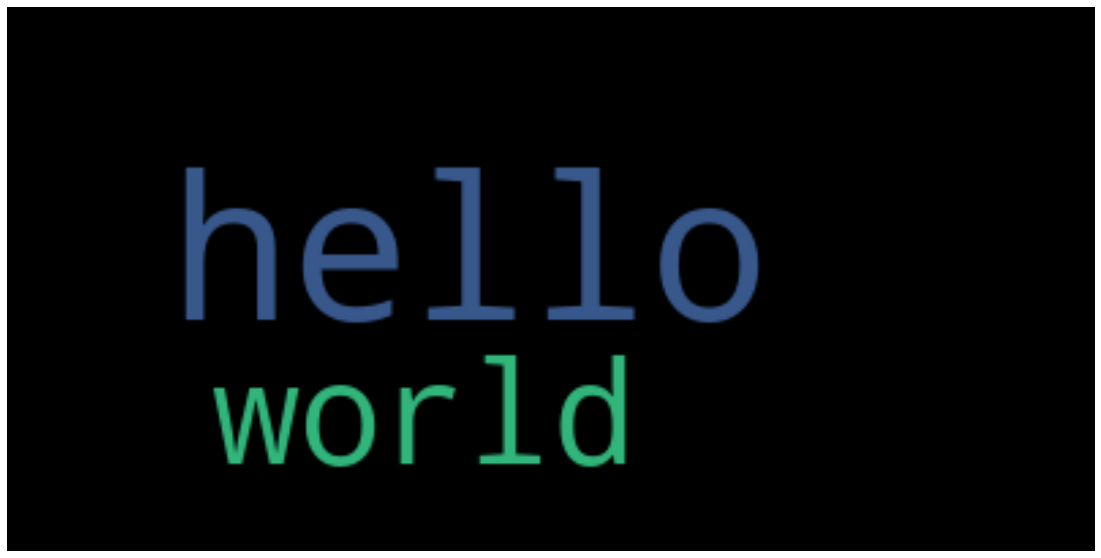

In [ ]:
# example
word_frequencies_1 = Counter({'hello':5,'world':2})
generateWordCloud(word_frequencies_1)

# Lexicon

When you run the code below, you will be prompted to upload a file from your computer. Upload the the file [lexicon.txt](https://seneca-my.sharepoint.com/:t:/g/personal/william_dick_senecacollege_ca/ERgdE83xJjVGrWZj6xkCJTQB6egoqC5v6UPnzvNl0bBhWw?e=KwIFUw) (you'll need to save it to your computer first). 

This file is a lexicon. It contains a list of tokens and an associated polarity score. A positive score means the word has positive sentiment. A negative score means the word has negative sentiment. A score of zero means the word is neutral. 

After uploading the lexicon as a flat file, we store it in a Python dictionary called `lexicon`. 

This lexicon coms from VADER (Valence Aware Dictionary and sEntiment Reasoner). The full VADER tool (which is not being used here) is slightly more sophisticated. You can find out more here: https://github.com/cjhutto/vaderSentiment. 

In [ ]:
uploaded_files = files.upload()
lexicon_file = uploaded_files['lexicon.txt'].decode()
lexicon = {}
for line in lexicon_file.split('\n'):
  split_line = line.split('\t')
  token = split_line[0]
  score = float(split_line[1])
  lexicon[token] = score

Saving lexicon.txt to lexicon.txt


In [ ]:
# example
example_words = ['great','horrible','bad','hello']
for word in example_words:
  if word in lexicon:
    print("'"+word+"': "+str(lexicon[word]))
  else:
    print("'"+word+"': not in lexicon")

'great': 3.1
'horrible': -2.5
'bad': -2.5
'hello': not in lexicon


In [ ]:
# example
word = 'amazing'
lexicon[word]

# Sentiment Score Functions

## `getSentimentScore(doc)`

`getSentimentScore(doc)` takes a document (a string) and returns a polarity score. The score is equal to `sum_of_scores / math.sqrt((sum_of_scores * sum_of_scores) + 15)`, where `sum_of_scores` of equal to the sum of the polarity scores of each token in the document. This method of scoring comes from VADER. 

In [ ]:
def getSentimentScore(doc):
  sum_of_scores = 0
  tokens = tokenize(doc)
  for token in tokens:
    if token in lexicon:
      score = lexicon[token]
    else:
      score = 0
    sum_of_scores += score
  norm_score = sum_of_scores / math.sqrt((sum_of_scores * sum_of_scores) + 15)
  return(norm_score)

In [ ]:
# example
doc1 = 'What a GREAT Game!!!'
getSentimentScore(doc1)

0.6248933269389457

In [ ]:
# example
doc2 = 'what a great game'
getSentimentScore(doc2)

0.6248933269389457

## `getCorpusSentimentScore(corpus)`

`getCorpusSentimentScore(corpus)` takes a corpus (a list of strings) and returns a polarity score. The score is equal to `sum_of_scores / math.sqrt((sum_of_scores * sum_of_scores) + 15)`, where `sum_of_scores` of equal to the sum of the polarity scores of each token in the corpus. 

In [ ]:
def getCorpusSentimentScore(corpus):
  sum_of_scores = 0
  for doc in corpus:
    tokens = tokenize(doc)
    for token in tokens:
      if token in lexicon:
        score = lexicon[token]
      else:
        score = 0
      sum_of_scores += score
  norm_score = sum_of_scores / math.sqrt((sum_of_scores * sum_of_scores) + 15)
  return(norm_score)

In [ ]:
# example
doc1 = 'what a great game'
doc2 = 'what a bad game'
#doc3 = 'WOW, great!'
corpusA = [doc1,doc2]
getCorpusSentimentScore(corpusA)

0.15309310892394867

## `getCorpusSentimentCounts(corpus)`


`getCorpusSentimentCounts(corpus)` takes a corpus (a list of strings) and returns a Python dictionary containing four keys: 
* `'pos'` for the number of positive documents in the corpus, 
* `'neg'` for the number of negative documents in the corpus, 
* `'neu'` for the number of negative documents in the corpus, and 
* `'tot'` for the total number of documents in the corpus. 

The sentiment of a document is determined by `getSentimentScore(doc)`:
* positive if 0.05 or above
* negative if -0.05 or below
* neutral otherwise



In [ ]:
def getCorpusSentimentCounts(corpus):
  counts = {'pos':0,'neg':0,'neu':0,'tot':0}
  for doc in corpus:
    score = getSentimentScore(doc)
    if score>=0.05:
      counts['pos'] += 1
    elif score<=-0.05:
      counts['neg'] += 1
    else:
      counts['neu'] += 1
    counts['tot'] += 1
  return(counts)

In [ ]:
# example
doc1 = 'Coke is the best.'
doc2 = 'I drink coke every day'
doc3 = 'Coke is horrible'
doc4 = 'Had a coke yesterday'
corpus1 = [doc1,doc2,doc3,doc4]
getCorpusSentimentCounts(corpus1)

{'pos': 1, 'neg': 1, 'neu': 2, 'tot': 4}

  # Function for Filtering Corpus

## `filterCorpus(corpus,tokens=None,sentiments=None)`

`filterCorpus(corpus,tokens=None,sentiments=None)` takes a corpus (a list of strings) and returns a filtered copy of that corpus. You can filter the corpus on `tokens` (only return documents that match the specificed tokens) and/or `sentiments` (only return documents that match the specificed sentiments: `'pos'`, `'neg'`, or `'neu'`). 

In [ ]:
def filterCorpus(corpus,tokens=None,sentiments=None):
  filtered_corpus = []
  for doc in corpus:
    if sentiments is None:
      valid_by_sentiment = True
    else:
      valid_by_sentiment = False
      sentiment_score = getSentimentScore(doc)
      for sentiment in sentiments:
        if (
            sentiment=='pos' and sentiment_score>=0.05 or
            sentiment=='neg' and sentiment_score<=-0.05 or
            sentiment=='neu' and sentiment_score>-0.05 and sentiment_score<0.05
        ):
          valid_by_sentiment = True
    if tokens is None:
      valid_by_token = True
    else:
      valid_by_token = False
      doc_tokens = tokenize(doc)
      for token in tokens:
        if token in doc_tokens:
          valid_by_token = True
    if valid_by_sentiment and valid_by_token:
      filtered_corpus.append(doc)
  return(filtered_corpus)

In [ ]:
# example
doc1 = 'Coke is the best.'
doc2 = 'Pepsi is great!'
doc3 = 'Coke is horrible'
doc4 = 'I hate Pepsi!'
corpus1 = [doc1,doc2,doc3,doc4]
filterCorpus(corpus1,tokens=['pepsi'],sentiments=['neg'])

['I hate Pepsi!']

# Download NLTK's Example Twitter Data

*NLTK* has a built-in example corpus of 20,000 tweets from April 30, 2015. We save this as `example_twitter_corpus`. 

In [ ]:
nltk.download('twitter_samples')
example_twitter_corpus = nltk.corpus.twitter_samples.docs('tweets.20150430-223406.json')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


`example_twitter_corpus` is a list. Each item in the list represents a tweet. Tweets are stored as Python dictionaries. Let's look at the first tweet in the corpus. 

In [ ]:
example_twitter_corpus[0]

{'in_reply_to_status_id': None,
 'contributors': None,
 'filter_level': 'low',
 'coordinates': None,
 'id_str': '593891099434983425',
 'favorited': False,
 'created_at': 'Thu Apr 30 21:34:06 +0000 2015',
 'favorite_count': 0,
 'in_reply_to_status_id_str': None,
 'retweeted_status': {'in_reply_to_status_id': None,
  'contributors': None,
  'filter_level': 'low',
  'coordinates': None,
  'id_str': '593885295323521025',
  'favorited': False,
  'created_at': 'Thu Apr 30 21:11:02 +0000 2015',
  'favorite_count': 3,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_screen_name': None,
  'place': None,
  'id': 593885295323521025,
  'retweeted': False,
  'truncated': False,
  'text': 'Indirect cost of the UK being in the EU is estimated to be costing Britain £170 billion per year! #BetterOffOut #UKIP',
  'in_reply_to_user_id_str': None,
  'lang': 'en',
  'retweet_count': 11,
  'user': {'statuses_count': 4589,
   'id_str': '929903647',
   'followers_count': 2973

For today's class, we really only care about one item: `text`. Let's create a new variable `example_twitter_corpus_text` that will just store the text from each tweet. 

In [ ]:
example_twitter_corpus_text = [tweet['text'] for tweet in example_twitter_corpus]

# Analyze NLTK's Example Twitter Data

Many of the tweets in this corpus are related to the 2015 federal election in the UK. The two major parties in the election were the Conservative Party led by David Cameron, and the Labour Party led by Ed Miliband. We are going to use the corpus to compare performance of the two parties. 

We use our `filterCorpus` method to create a Conservative corpus and a Labour corpus. 

In [ ]:
con_corpus = filterCorpus(example_twitter_corpus_text,tokens=['world','cameron'])
lab_corpus = filterCorpus(example_twitter_corpus_text,tokens=['hello','miliband'])

We use `getCorpusSentimentCounts` to calculate the number of positive, negative, neutral, and total tweets for each party. 

In [ ]:
con_corpus_counts = getCorpusSentimentCounts(con_corpus)
lab_corpus_counts = getCorpusSentimentCounts(lab_corpus)

We calculate the following summary statistics:
* Number of Tweets
* Share of Voice
* Positive Percent
* Neutral Percent
* Negative Percent
* Net Positive Percent

In [ ]:
con_corpus_summary = {
    'NTweets' : con_corpus_counts['tot'],
    'ShareofVoice' : 100*con_corpus_counts['tot']/(con_corpus_counts['tot']+lab_corpus_counts['tot']),
    'PositivePct' : 100*con_corpus_counts['pos']/con_corpus_counts['tot'],
    'NeutralPct' : 100*con_corpus_counts['neu']/con_corpus_counts['tot'],
    'NegativePct' : 100*con_corpus_counts['neg']/con_corpus_counts['tot'],
    'NetPositivePct' : 100*(con_corpus_counts['pos']-con_corpus_counts['neg'])/con_corpus_counts['tot']
}
lab_corpus_summary = {
    'NTweets' : lab_corpus_counts['tot'],
    'ShareofVoice' : 100*lab_corpus_counts['tot']/(con_corpus_counts['tot']+lab_corpus_counts['tot']),
    'PositivePct' : 100*lab_corpus_counts['pos']/lab_corpus_counts['tot'],
    'NeutralPct' : 100*lab_corpus_counts['neu']/lab_corpus_counts['tot'],
    'NegativePct' : 100*lab_corpus_counts['neg']/lab_corpus_counts['tot'],
    'NetPositivePct' : 100*(lab_corpus_counts['pos']-lab_corpus_counts['neg'])/lab_corpus_counts['tot']
}

We display these summary statistics in a table. 

In [ ]:
print("")
print(' | '+
      'Party          | '+
      '# Tweets       | '+
      'Share of Voice | '+
      'Positive %     | '+
      'Neutral %      | '+
      'Negative %     | '+
      'Net Positive % | ')
print("")
print((" | "+
      "Labour         | "+
      "{NTweets:5.0f}          | "+
      "{ShareofVoice:5.2f}%         | "+
      "{PositivePct:2.2f}%         | "+
      "{NeutralPct:2.2f}%         | "+
      "{NegativePct:2.2f}%         | "+
      "{NetPositivePct:2.2f}%         | ").format(**lab_corpus_summary))
print((" | "+
      "Conservative   | "+
      "{NTweets:5.0f}          | "+
      "{ShareofVoice:5.2f}%         | "+
      "{PositivePct:2.2f}%         | "+
      "{NeutralPct:2.2f}%         | "+
      "{NegativePct:2.2f}%         | "+
      "{NetPositivePct:2.2f}%         | ").format(**con_corpus_summary))
print("")


 | Party          | # Tweets       | Share of Voice | Positive %     | Neutral %      | Negative %     | Net Positive % | 

 | Labour         |  5309          | 68.47%         | 50.29%         | 28.97%         | 20.74%         | 29.55%         | 
 | Conservative   |  2445          | 31.53%         | 42.90%         | 32.19%         | 24.91%         | 18.00%         | 



# Live Twitter Data

To download live Twitter data, you will need a bearer token. To get a bearer token, you will need a devloper account. Go to https://developer.twitter.com/en to sign up. 

When you run the code below, you will be prompted to upload a file from your computer. Create a new text file on your computer called `'twitter_bearer_token.txt'`. This file should contain a single line consiting of your bearer token and nothing else (no white space, no new lines, just the token). 

In [ ]:
uploaded_files = files.upload()
twitter_bearer_token = uploaded_files['twitter_bearer_token.txt'].decode()

Saving twitter_bearer_token.txt to twitter_bearer_token.txt


The following code downloads 1000 recent tweets containing the words "trudeau" or "poilievre" and saves them in `tweets`. 

This code uses the Twitter API's Recent Search endpoint. See https://developer.twitter.com/en/docs/twitter-api/tweets/search/introduction for documentation. This endpoint only provides access to tweets from the past week. 

In [ ]:
tweets = []
next_token = None
while len(tweets)<1000:
  response = requests.get(
      url = 'https://api.twitter.com/2/tweets/search/recent',
      params = {
        'query':'trudeau OR poilievre',
        'next_token':next_token},
      headers = {'authorization' : 'bearer '+twitter_bearer_token} 
      )
  response_json = response.json()
  for tweet in response_json['data']:
    tweets.append(tweet)
  if 'next_token' not in response_json['meta']:
    break
  next_token = response_json['meta']['next_token']

InvalidHeader: ignored

Each tweet is represented by a dictionary. Let's look at the first tweet. It contains two fields:
* id
* text

It is possible to download additional fields. See the API documentation referenced above. 

In [ ]:
tweets[0]

{'id': '1569763718249996289',
 'text': 'RT @CityNewsVAN: #BREAKING NEWS: Prime Minister Justin Trudeau says next Monday, the day of Queen Elizabeth II’s funeral, will be a federal…'}

For now, we only care about the `'text'` field, so lets store that in `tweets_text`.

In [ ]:
tweets_text = [tweet['text'] for tweet in tweets]

In [ ]:
# example
tweets_text[0]

We can perform the a similar analysis as we did with the NLTK sample tweets. 

In [ ]:
poilievre_corpus = filterCorpus(tweets_text,tokens=['poilievre'])
trudeau_corpus = filterCorpus(tweets_text,tokens=['trudeau'])

poilievre_corpus_counts = getCorpusSentimentCounts(poilievre_corpus)
trudeau_corpus_counts = getCorpusSentimentCounts(trudeau_corpus)

poilievre_corpus_summary = {
    'NTweets' : poilievre_corpus_counts['tot'],
    'ShareofVoice' : 100*poilievre_corpus_counts['tot']/(poilievre_corpus_counts['tot']+trudeau_corpus_counts['tot']),
    'PositivePct' : 100*poilievre_corpus_counts['pos']/poilievre_corpus_counts['tot'],
    'NeutralPct' : 100*poilievre_corpus_counts['neu']/poilievre_corpus_counts['tot'],
    'NegativePct' : 100*poilievre_corpus_counts['neg']/poilievre_corpus_counts['tot'],
    'NetPositivePct' : 100*(poilievre_corpus_counts['pos']-poilievre_corpus_counts['neg'])/poilievre_corpus_counts['tot']
}
trudeau_corpus_summary = {
    'NTweets' : trudeau_corpus_counts['tot'],
    'ShareofVoice' : 100*trudeau_corpus_counts['tot']/(poilievre_corpus_counts['tot']+trudeau_corpus_counts['tot']),
    'PositivePct' : 100*trudeau_corpus_counts['pos']/trudeau_corpus_counts['tot'],
    'NeutralPct' : 100*trudeau_corpus_counts['neu']/trudeau_corpus_counts['tot'],
    'NegativePct' : 100*trudeau_corpus_counts['neg']/trudeau_corpus_counts['tot'],
    'NetPositivePct' : 100*(trudeau_corpus_counts['pos']-trudeau_corpus_counts['neg'])/trudeau_corpus_counts['tot']
}

print("")
print(' | '+
      'Party          | '+
      '# Tweets       | '+
      'Share of Voice | '+
      'Positive %     | '+
      'Neutral %      | '+
      'Negative %     | '+
      'Net Positive % | ')
print("")
print((" | "+
      "Trudeau        | "+
      "{NTweets:5.0f}          | "+
      "{ShareofVoice:5.2f}%         | "+
      "{PositivePct:2.2f}%         | "+
      "{NeutralPct:2.2f}%         | "+
      "{NegativePct:2.2f}%         | "+
      "{NetPositivePct:2.2f}%         | ").format(**trudeau_corpus_summary))
print((" | "+
      "Poilievre      | "+
      "{NTweets:5.0f}          | "+
      "{ShareofVoice:5.2f}%         | "+
      "{PositivePct:2.2f}%         | "+
      "{NeutralPct:2.2f}%         | "+
      "{NegativePct:2.2f}%         | "+
      "{NetPositivePct:2.2f}%         | ").format(**poilievre_corpus_summary))
print("")


 | Party          | # Tweets       | Share of Voice | Positive %     | Neutral %      | Negative %     | Net Positive % | 

 | Trudeau        |   505          | 65.93%         | 38.22%         | 21.98%         | 39.80%         | -1.58%         | 
 | Poilievre      |   261          | 34.07%         | 35.25%         | 32.18%         | 32.57%         | 2.68%         | 

